<a href="https://colab.research.google.com/github/crpytoscooby/College/blob/master/ML_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ML Assignment 4 - Clustering** 

Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the dataset

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df.shape

(200, 5)

Checking if there are any null values in the dataset

In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Extracting the Annual Income and Spending Score columns

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].to_numpy()
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

#Part A - K Means Clustering

In [ ]:
from sklearn.cluster import KMeans

Elbow Graph

Within-Cluster-Sum-of-Squares (WCSS)

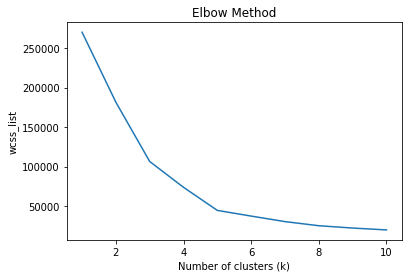

In [ ]:
wcss_list= []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit_predict(X)
  wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('wcss_list')
plt.show()

Training the model on dataset

In [ ]:
kmeans = KMeans(n_clusters=5)
y_predict=kmeans.fit_predict(X)
y_predict

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

Plotting the clusters

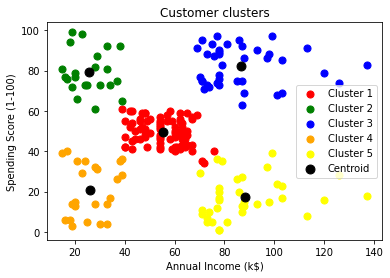

In [ ]:
plt.scatter(X[y_predict == 0,0], X[y_predict == 0,1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_predict == 1,0], X[y_predict == 1,1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_predict == 2,0], X[y_predict == 2,1], s = 50, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_predict == 3,0], X[y_predict == 3,1], s = 50, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_predict == 4,0], X[y_predict == 4,1], s = 50, c = 'yellow', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 80, c = 'black', label = 'Centroid')
plt.title('Customer clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#Part B - Agglomerative Clustering

Dendrogram Plot

To visualize hierarchical clustering

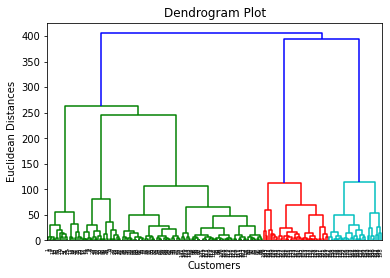

In [ ]:
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(X, method="ward"))
plt.title("Dendrogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Customers")
plt.show()

Agglomerative Clustering 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred = ac.fit_predict(X)

Ploting the clusters

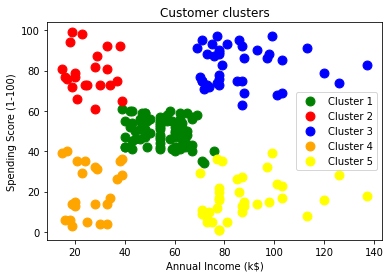

In [ ]:
plt.scatter(X[y_predict == 0,0], X[y_predict == 0,1], s = 80, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_predict == 1,0], X[y_predict == 1,1], s = 80, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_predict == 2,0], X[y_predict == 2,1], s = 80, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_predict == 3,0], X[y_predict == 3,1], s = 80, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_predict == 4,0], X[y_predict == 4,1], s = 80, c = 'yellow', label = 'Cluster 5')
plt.title('Customer clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()